# Two Qubits Time independent Hamiltonian Simulation 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# for 3d interactive display of the bloch sphere
from kaleidoscope import bloch_sphere
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from qiskit.quantum_info import Statevector, partial_trace

Define the initial state to: $ |\phi(0)\rangle =   |00\rangle$.
Define the Hamiltonian as $ H = \sigma_x \otimes \sigma_x$.

In [7]:
initial_state = tensor(basis(2, 0), basis(2, 0))
print(initial_state)
H = tensor(sigmax(), sigmax())
print(H)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


Simulate using the Schrodinger Equation Solver:  sesolve() (https://qutip.org/docs/latest/apidoc/functions.html#module-qutip.sesolve). 

What state are we projecting agains? We measure the first qubit for $\sigma_z$ and the second qubit for $\sigma_z$. So, e_ops must be $ \left[ \sigma_z \otimes 1, 1 \otimes \sigma_z \right] $

In [8]:
# define state on which to project
s_project = [tensor(sigmaz(), qeye(2)), tensor(qeye(2), sigmaz())]

# define time points
times = np.linspace(0.0, 10, 100)

# run the simulation- to get expectation values we pass s_project
result = sesolve(H, initial_state, times, s_project)# add progress_bar=True to see progress

# run the simulation- to get states values we leave s_project as none
state_result = sesolve(H, initial_state, times, [])# add progress_bar=True to see progress

Unpack the result of the simulation:

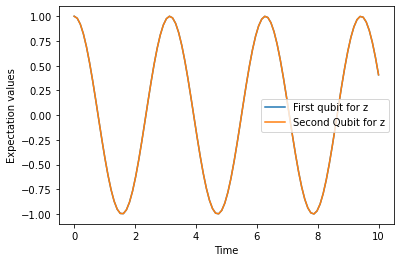

In [9]:
# expectaion plot
fig, ax = plt.subplots()
ax.plot(times, result.expect[0]) 
ax.plot(times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("First qubit for z", "Second Qubit for z")) 
plt.show() 


Here the expectaion values for the qubits are equal for every point in time (the plots are on top of each other). This is expected as the qubits are not entagled and they start from the same state. If the state of the qubit is $ |01\rangle$,for example, we would expect the two plot to have $\pi# phase difference. 

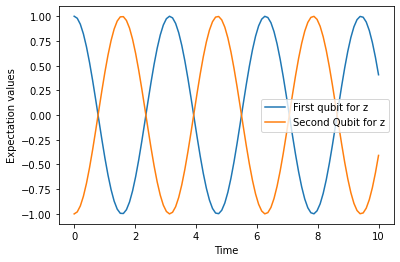

In [10]:
initial_state = tensor(basis(2, 0), basis(2, 1))
H = tensor(sigmax(), sigmax())

# define state on which to project
s_project = [tensor(sigmaz(), qeye(2)), tensor(qeye(2), sigmaz())]

# define time points
times = np.linspace(0.0, 10, 100)

# run the simulation- to get expectation values we pass s_project
result = sesolve(H, initial_state, times, s_project)# add progress_bar=True to see progress

# run the simulation- to get states values we leave s_project as none
state_result = sesolve(H, initial_state, times, [])# add progress_bar=True to see progress

# expectaion plot
fig, ax = plt.subplots()
ax.plot(times, result.expect[0]) 
ax.plot(times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("First qubit for z", "Second Qubit for z")) 
plt.show() 

